# Support Vector Machine (GD Method)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

## Dataset

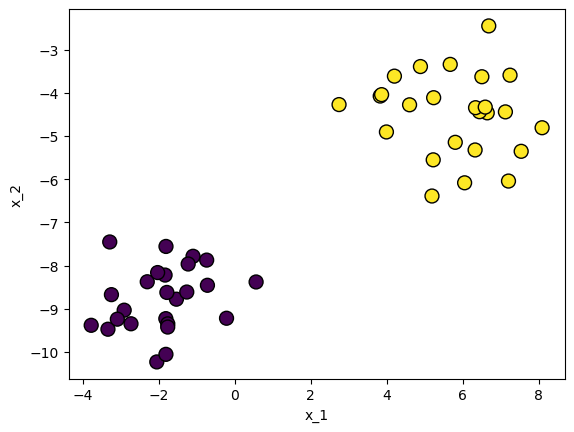

In [3]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

## Model


In [6]:
class SVM:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        # initialization
        self.lr = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        # Update parameters
        y_ =  np.where(y <= 0, -1, +1)
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for i  in range(self.n_iters):
          for idx, x_i in enumerate(X):
            condition = y_[idx] * (np.dot(x_i, self.w) + self.b)>=1
            if not condition:
              #gradient update
              self.w -= self.lr * (-np.dot(x_i, y_[idx]))
              self.b -= self.lr * (-y_[idx])

    def predict(self, X):
        # Prediction
        prediction = np.dot(X, self.w) + self.b
        prediction = np.sign(prediction)
        return prediction

## Prediction

In [7]:
model = SVM()
model.fit(X, y)

print(model.w, model.b)

[0.60413086 0.16688988] 0.058000000000000045


In [8]:
margin = 2 / np.sqrt(np.dot(model.w.T, model.w))
print(margin)

3.1910212637738264


## Visulization

In [13]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

def visualize_svm(w, b):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.show()

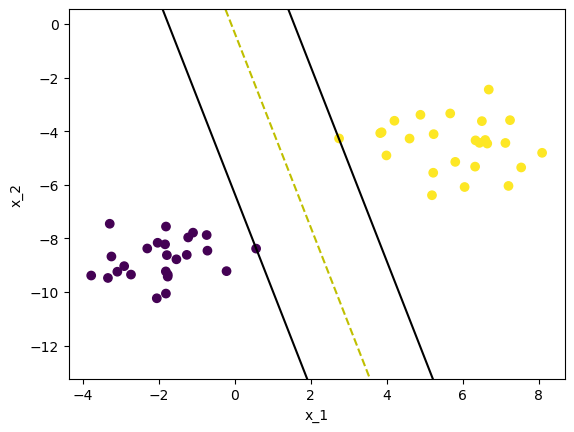

In [11]:
visualize_svm(model.w, model.b)

## scikit-learn 라이브러리를 이용한 SVM

In [16]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

In [17]:
margin = 2 / np.sqrt(np.dot(model.coef_[0].T, model.coef_[0]))
print(margin)

4.5366449473146595


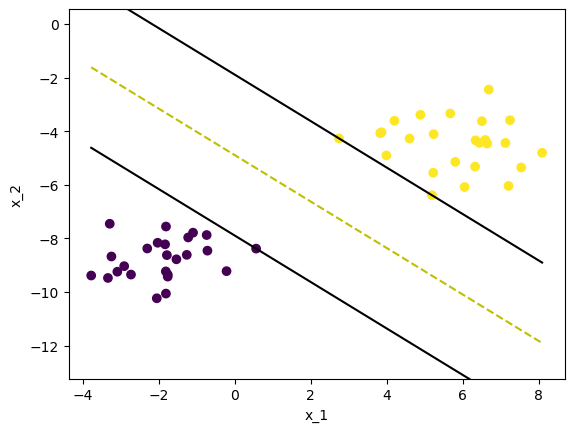

In [18]:
visualize_svm(model.coef_[0], model.intercept_)